In [1]:
import numpy as np

import matplotlib.pyplot as plt
import os
#from NanoFan import *
from scipy.optimize import curve_fit
from scipy import optimize
from scipy.interpolate import CubicSpline
#import gdstk
import csv
import pandas as pd
import tidy3d as td
from tidy3d import web
from TMM import *
from NanoParse import *

from IPython.display import Image, display

There is not much in the literature around use of infra-red light in lateral shift sensing setups. For this investigation a brief study of lateral shift FWHM and shift amount at NIR ranges will be obeserverd.

## Setup

The TMM matrix method will be used, consisting of a prism, gold , and metal layer, sapphire will be used for the prism material assuming birefringent effects are ignored. Below are the refractive indices of water, air, sapphire and gold in visible (what we currently use) and NIR.

In [23]:
#visible light
gold_nk= (1e-9 + 3.4332j)
gold_thick = crit_thick(wavelength=633e-9, n_metal=gold_nk)
water_nk =1.3317
sapphire_nk = 1.7659

#infra-red 1100nm
gold_nk_ir =  0.38797 +8.7971j
gold_thick_ir = crit_thick(wavelength=1100e-9, n_metal=(0.27750 + 7.2433j))
water_nk_ir =1.3270
sapphire_ir= 1.7538
air=1

## Investigation 1100nm compared to 633nm

First we observe the plasmon condition and shift under infra-red.

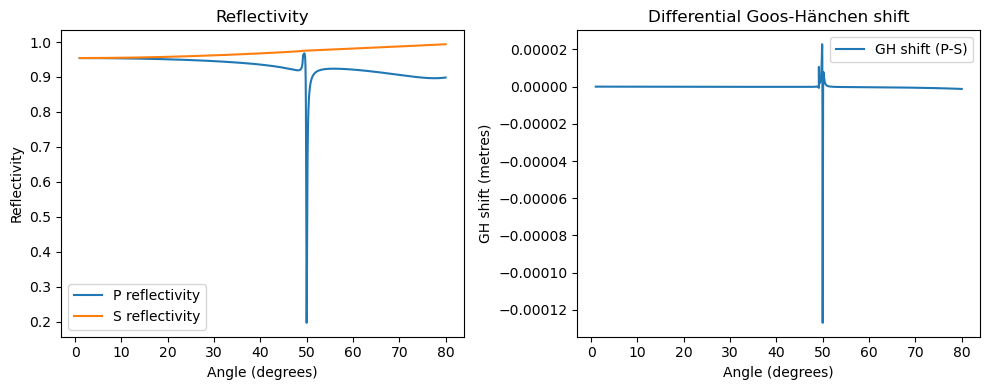

In [24]:
unw_pphas, unw_sphas ,sphas, pphas, sref, pref, gh_shift_p, gh_shift_s, diff_gh, angles = scan_anglex(start_angle = 1,end_angle=80,scans=100000,n1=sapphire_ir, n2=gold_nk_ir,
     n3=water_nk_ir,wavelength=1300e-9, tg=gold_thick_ir, ts=1e-20, ts_total=1e-11 ,layering='off', plot='simple') #try using smaller ts 1e-9, 1e-10

In [25]:
gold_thick_ir

4.7798055881494804e-08

Then visible light

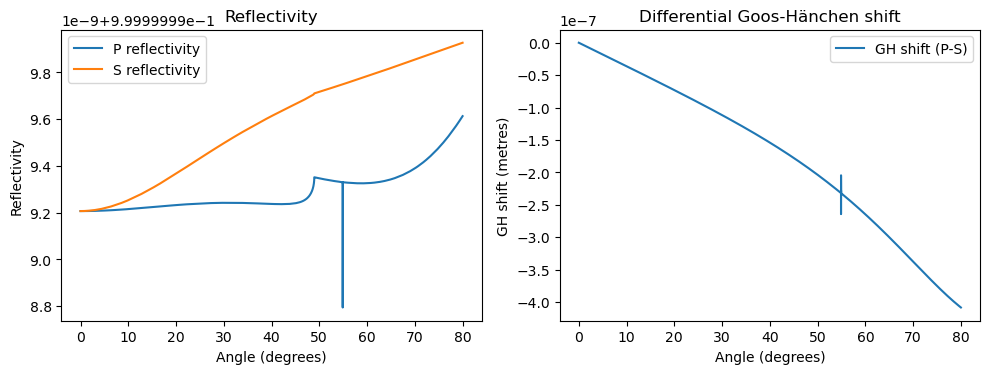

In [26]:
unw_pphas, unw_sphas ,sphas, pphas, sref, pref, gh_shift_p, gh_shift_s, diff_gh, angles = scan_anglex(start_angle = 0,end_angle=80,scans=100000,n1=1.7659,n2=gold_nk,
     n3=1.3317,wavelength=633e-9, tg=gold_thick, ts=1e-20, ts_total=1e-11 ,layering='off', plot='simple') #try using smaller ts 1e-9, 1e-10

It appears, that infra-red not only deepens the shift but decreases its FWHM. The lateral shift increase is roughly by 10x

## Investigation 3000nm

In [84]:
gold_mir = 0.0000005 + 5.403j
gold_thick_mir = crit_thick(wavelength=1100e-9, n_metal=gold_mir)
water_mir =1.3270
sapphire_mir = n = 1.7538


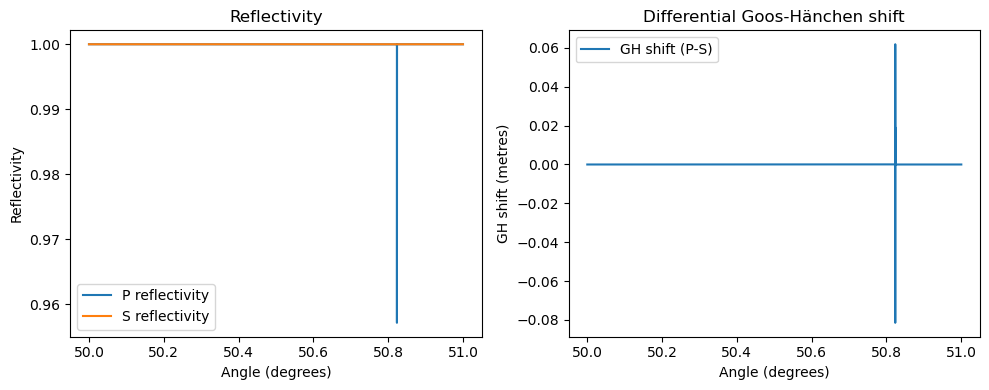

In [85]:
unw_pphas, unw_sphas ,sphas, pphas, sref, pref, gh_shift_p, gh_shift_s, diff_gh, angles = scan_anglex(start_angle = 50,end_angle=51,scans=100000,n1=1.7659,n2=gold_mir,
     n3=water_mir,wavelength=1100e-9, tg=gold_thick_mir, ts=1e-20, ts_total=1e-11 ,layering='off', plot='simple') #try using smaller ts 1e-9, 1e-10

In [86]:
gold_mir = 1e-9 + 20.3j
gold_thick_mir = crit_thick(wavelength=3000e-9, n_metal=(0.55046 + 20.403j))
water_mir =1.3710
sapphire_mir = 1.7122


In [87]:
gold_thick_mir

5.0381866423389536e-08

In [98]:
gold_mir = 1e-10 + 40.403j
gold_thick_mir = crit_thick(wavelength=1100e-9, n_metal=gold_mir)
water_mir =1.3270
sapphire_mir = n = 1.7538


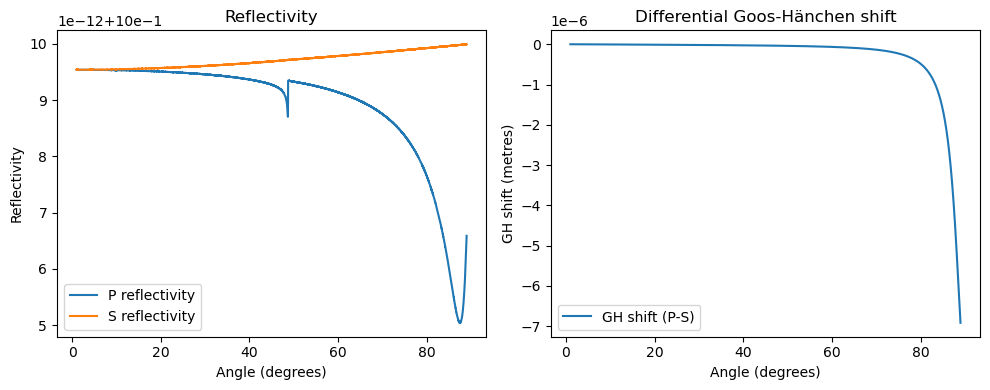

In [100]:
unw_pphas, unw_sphas ,sphas, pphas, sref, pref, gh_shift_p, gh_shift_s, diff_gh, angles = scan_anglex(start_angle = 1,end_angle=89,scans=100000,n1=1.7659,n2=gold_mir,
     n3=water_mir,wavelength=1100e-9, tg=gold_thick_mir, ts=1e-20, ts_total=1e-11 ,layering='off', plot='simple') #try using smaller ts 1e-9, 1e-10

Increasing the wavelength again this time to the MIR at 3000nm shows another OOM increase in the lateral shift. However the extinction factor of gold is particularly large. This should result in high losses within the metal.

## Validation with FDTD

The theoretical calculations show massive increase in the lateral shift. However I am sceptical of these results. The high extinction value of gold should result in high losses and broadening of the plasmon resonance curve. The only way to check then is to do FDTD simulations of these paramaters.

Plotting for angle 40.0


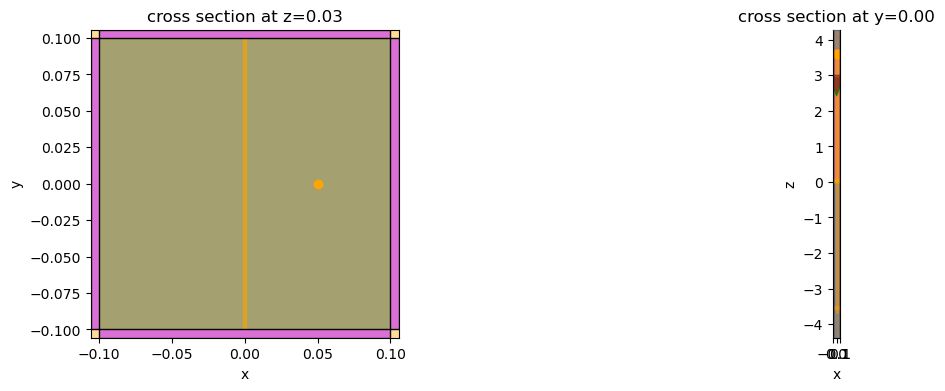

08:28:16 GMT Standard Time Created task 'Nanohole Array' with task_id           
                           'fdve-b9171719-2644-41a9-b73d-b0524d40e6d8' and      
                           task_type 'FDTD'.

                           View task using web UI at                            
                           ]8;id=388301;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b9171719-2644-41a9-b73d-b0524d40e6d8\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=790277;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b9171719-2644-41a9-b73d-b0524d40e6d8\taskId]8;;\]8;id=388301;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b9171719-2644-41a9-b73d-b0524d40e6d8\=]8;;\]8;id=764022;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b9171719-2644-41a9-b73d-b0524d40e6d8\fdv]8;;\
                           ]8;id=764022;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b9171719-2644-41a9-b73d-b0524d40e6d8\e]8;;\]8;id=388301;https://tidy3d.simulation.cloud/workbench?taskId=fdve-b9171719-2644-41a9-b73d-b0524d40e6d8\-b9171719-2644-41a9-b73d-b0524d40e6d8']8;;\.

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

08:28:18 GMT Standard Time Maximum FlexCredit cost: 0.126. Minimum cost depends 
                           on task execution details. Use                       
                           'web.real_cost(task_id)' to get the billed FlexCredit
                           cost after a simulation run.

This simulation will cost 0.12634992030406123 flex credits
30 simulations will cost 3.7904976091218368 flex credits


Proceed? 


C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

08:28:34 GMT Standard Time Started working on Batch containing 30 tasks.

08:29:38 GMT Standard Time Maximum FlexCredit cost: 3.790 for the whole batch.

                           Use 'Batch.real_cost()' to get the billed FlexCredit 
                           cost after the Batch has completed.

08:35:59 GMT Standard Time Batch complete.

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

08:36:29 GMT Standard Time WARNING: Simulation final field decay value of 0.953 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.954 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:36:30 GMT Standard Time WARNING: Simulation final field decay value of 0.954 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.954 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.954 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:36:31 GMT Standard Time WARNING: Simulation final field decay value of 0.954 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.954 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.954 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:36:32 GMT Standard Time WARNING: Simulation final field decay value of 0.955 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.955 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:36:33 GMT Standard Time WARNING: Simulation final field decay value of 0.955 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.955 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.955 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:36:34 GMT Standard Time WARNING: Simulation final field decay value of 0.955 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.956 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.956 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:36:35 GMT Standard Time WARNING: Simulation final field decay value of 0.956 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.957 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.958 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:36:36 GMT Standard Time WARNING: Simulation final field decay value of 0.965 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.959 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:36:37 GMT Standard Time WARNING: Simulation final field decay value of 0.957 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.957 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.957 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:36:38 GMT Standard Time WARNING: Simulation final field decay value of 0.958 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.958 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.958 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:36:39 GMT Standard Time WARNING: Simulation final field decay value of 0.958 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.959 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

In [60]:
film_phase, film_shift,film_ref,angles =nanohole_scan(
    wavelength_range=(2.99, 3),#HeNe laser
    Nfreqs = 5,
    source='PlaneWave', #choose PlaneWave or Gaussian
    height = 0.03,#depth of each hole
    spacing = 0.2,#spacing between holes
    diameter = 0.1,#hole diamater
    t_base = 0.050381866,#metal film thickness
    metal_material = td.material_library['Au']['Olmon2012crystal'],#using JC gold for now
    background_material = td.Medium(permittivity=(1.3710)**2),# air for now
    prism_material=td.Medium(permittivity=(1.7122)**2),#bk7 prism n =1.53 at 417
    sample_material =td.Medium(permittivity=(1.3710)**2),# water#glycerol
    pol_angle = 0, #0 for p, pi/2 for s
    run_t  = 500,
    grid_res = 40,
    mesh_res=10,   #defined as metal thickness /mesh res
    n_prism=1.778,
    hole='zero',
    start_angle = 40,
    end_angle = 60,
    steps = 30,
    sim_height=2.5)

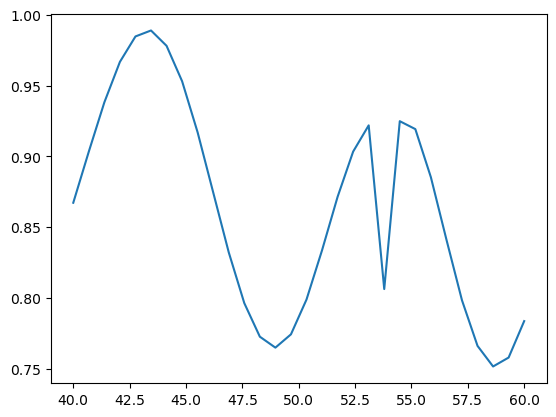

In [61]:
plt.plot(angles, film_ref)

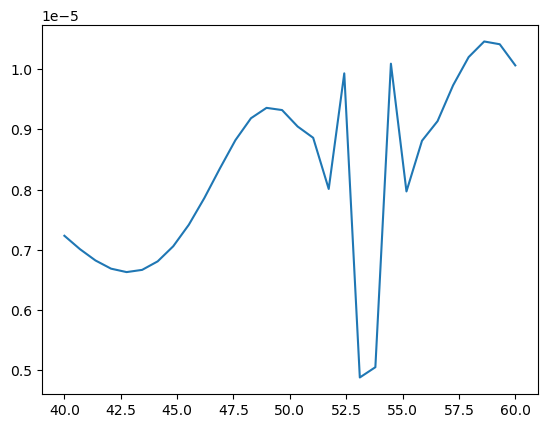

In [62]:
plt.plot(angles, film_shift)

Plotting for angle 52.5


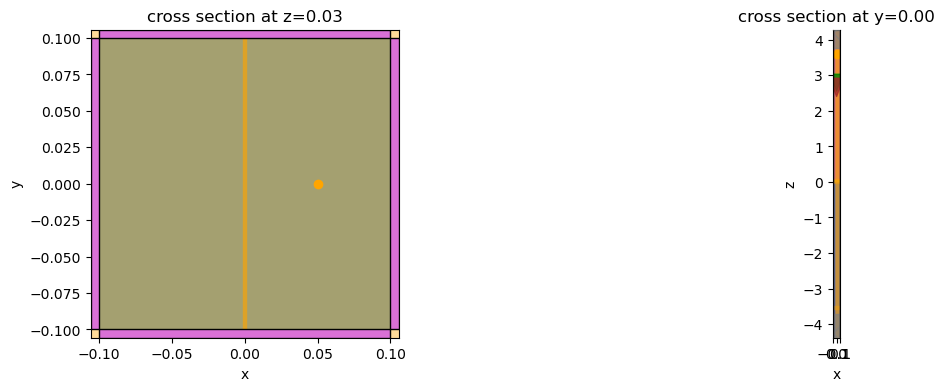

08:37:59 GMT Standard Time Created task 'Nanohole Array' with task_id           
                           'fdve-71e61d1b-52e0-4575-9738-a59b4c51d1d7' and      
                           task_type 'FDTD'.

                           View task using web UI at                            
                           ]8;id=663577;https://tidy3d.simulation.cloud/workbench?taskId=fdve-71e61d1b-52e0-4575-9738-a59b4c51d1d7\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=313957;https://tidy3d.simulation.cloud/workbench?taskId=fdve-71e61d1b-52e0-4575-9738-a59b4c51d1d7\taskId]8;;\]8;id=663577;https://tidy3d.simulation.cloud/workbench?taskId=fdve-71e61d1b-52e0-4575-9738-a59b4c51d1d7\=]8;;\]8;id=837483;https://tidy3d.simulation.cloud/workbench?taskId=fdve-71e61d1b-52e0-4575-9738-a59b4c51d1d7\fdv]8;;\
                           ]8;id=837483;https://tidy3d.simulation.cloud/workbench?taskId=fdve-71e61d1b-52e0-4575-9738-a59b4c51d1d7\e]8;;\]8;id=663577;https://tidy3d.simulation.cloud/workbench?taskId=fdve-71e61d1b-52e0-4575-9738-a59b4c51d1d7\-71e61d1b-52e0-4575-9738-a59b4c51d1d7']8;;\.

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

08:38:01 GMT Standard Time Maximum FlexCredit cost: 0.126. Minimum cost depends 
                           on task execution details. Use                       
                           'web.real_cost(task_id)' to get the billed FlexCredit
                           cost after a simulation run.

This simulation will cost 0.12634992030406123 flex credits
30 simulations will cost 3.7904976091218368 flex credits


Proceed? 


C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

08:38:17 GMT Standard Time Started working on Batch containing 30 tasks.

08:39:25 GMT Standard Time Maximum FlexCredit cost: 3.790 for the whole batch.

                           Use 'Batch.real_cost()' to get the billed FlexCredit 
                           cost after the Batch has completed.

08:45:59 GMT Standard Time Batch complete.

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

08:46:29 GMT Standard Time WARNING: Simulation final field decay value of 0.958 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:46:30 GMT Standard Time WARNING: Simulation final field decay value of 0.958 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.958 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.958 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:46:31 GMT Standard Time WARNING: Simulation final field decay value of 0.957 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.955 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.953 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:46:32 GMT Standard Time WARNING: Simulation final field decay value of 0.965 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:46:33 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:46:34 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:46:35 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.969 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.952 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:46:36 GMT Standard Time WARNING: Simulation final field decay value of 0.952 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.955 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.957 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:46:37 GMT Standard Time WARNING: Simulation final field decay value of 0.958 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.959 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.959 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:46:38 GMT Standard Time WARNING: Simulation final field decay value of 0.959 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.958 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.958 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

08:46:39 GMT Standard Time WARNING: Simulation final field decay value of 0.958 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.958 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

In [63]:
film_phase2, film_shift2,film_ref2,angles2 =nanohole_scan(
    wavelength_range=(2.99, 3),#HeNe laser
    Nfreqs = 5,
    source='PlaneWave', #choose PlaneWave or Gaussian
    height = 0.03,#depth of each hole
    spacing = 0.2,#spacing between holes
    diameter = 0.1,#hole diamater
    t_base = 0.050381866,#metal film thickness
    metal_material = td.material_library['Au']['Olmon2012crystal'],#using JC gold for now
    background_material = td.Medium(permittivity=(1.3710)**2),# air for now
    prism_material=td.Medium(permittivity=(1.7122)**2),#bk7 prism n =1.53 at 417
    sample_material =td.Medium(permittivity=(1.3710)**2),# water#glycerol
    pol_angle = 0, #0 for p, pi/2 for s
    run_t  = 500,
    grid_res = 40,
    mesh_res=10,   #defined as metal thickness /mesh res
    n_prism=1.778,
    hole='zero',
    start_angle = 52.5,
    end_angle = 55,
    steps = 30,
    sim_height=2.5)

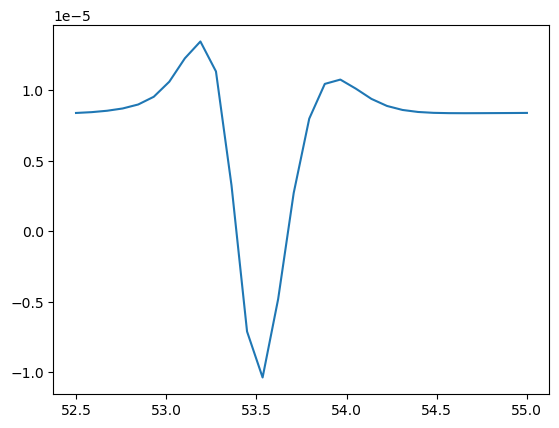

In [64]:
plt.plot(angles2, film_shift2)

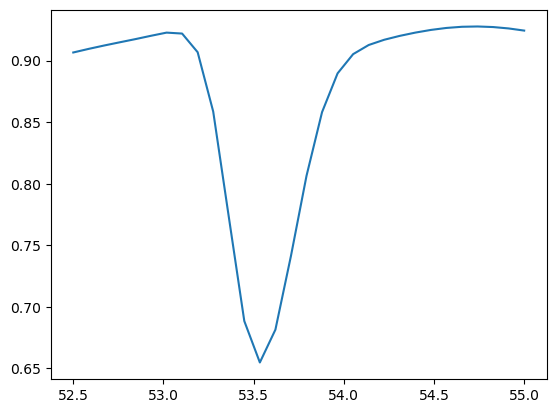

In [66]:
plt.plot(angles2, film_ref2)

Plotting for angle 53.0


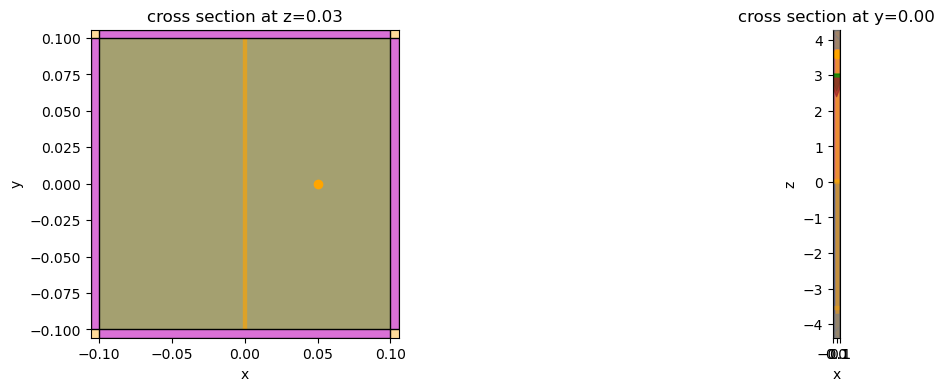

08:51:42 GMT Standard Time Created task 'Nanohole Array' with task_id           
                           'fdve-c09cdc5c-4fa1-41da-983c-c47b5947f62a' and      
                           task_type 'FDTD'.

                           View task using web UI at                            
                           ]8;id=463301;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c09cdc5c-4fa1-41da-983c-c47b5947f62a\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=852841;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c09cdc5c-4fa1-41da-983c-c47b5947f62a\taskId]8;;\]8;id=463301;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c09cdc5c-4fa1-41da-983c-c47b5947f62a\=]8;;\]8;id=377623;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c09cdc5c-4fa1-41da-983c-c47b5947f62a\fdv]8;;\
                           ]8;id=377623;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c09cdc5c-4fa1-41da-983c-c47b5947f62a\e]8;;\]8;id=463301;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c09cdc5c-4fa1-41da-983c-c47b5947f62a\-c09cdc5c-4fa1-41da-983c-c47b5947f62a']8;;\.

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

08:51:44 GMT Standard Time Maximum FlexCredit cost: 0.126. Minimum cost depends 
                           on task execution details. Use                       
                           'web.real_cost(task_id)' to get the billed FlexCredit
                           cost after a simulation run.

This simulation will cost 0.12634992030406123 flex credits
30 simulations will cost 3.7904976091218368 flex credits


Proceed? 


C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

08:51:59 GMT Standard Time Started working on Batch containing 30 tasks.

08:52:57 GMT Standard Time Maximum FlexCredit cost: 3.790 for the whole batch.

                           Use 'Batch.real_cost()' to get the billed FlexCredit 
                           cost after the Batch has completed.

09:01:21 GMT Standard Time Batch complete.

C:\Users\dxc167\AppData\Local\anaconda3\envs\code\lib\site-packages\rich\live.py
:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

09:01:54 GMT Standard Time WARNING: Simulation final field decay value of 0.953 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

09:01:55 GMT Standard Time WARNING: Simulation final field decay value of 0.954 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.957 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.965 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

09:01:56 GMT Standard Time WARNING: Simulation final field decay value of 0.979 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

09:01:57 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

09:01:58 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

09:01:59 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

09:02:00 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

09:02:01 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

09:02:02 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

09:02:03 GMT Standard Time WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 1.0 is
                           greater than the simulation shutoff threshold of     
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.982 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

09:02:04 GMT Standard Time WARNING: Simulation final field decay value of 0.969 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

                           WARNING: Simulation final field decay value of 0.959 
                           is greater than the simulation shutoff threshold of  
                           1e-05. Consider running the simulation again with a  
                           larger 'run_time' duration for more accurate results.

In [67]:
film_phase3, film_shift3,film_ref3,angles3 =nanohole_scan(
    wavelength_range=(2.99, 3),#HeNe laser
    Nfreqs = 5,
    source='PlaneWave', #choose PlaneWave or Gaussian
    height = 0.03,#depth of each hole
    spacing = 0.2,#spacing between holes
    diameter = 0.1,#hole diamater
    t_base = 0.050381866,#metal film thickness
    metal_material = td.material_library['Au']['Olmon2012crystal'],#using JC gold for now
    background_material = td.Medium(permittivity=(1.3710)**2),# air for now
    prism_material=td.Medium(permittivity=(1.7122)**2),#bk7 prism n =1.53 at 417
    sample_material =td.Medium(permittivity=(1.3710)**2),# water#glycerol
    pol_angle = 0, #0 for p, pi/2 for s
    run_t  = 500,
    grid_res = 40,
    mesh_res=10,   #defined as metal thickness /mesh res
    n_prism=1.778,
    hole='zero',
    start_angle = 53,
    end_angle = 54,
    steps = 30,
    sim_height=2.5)

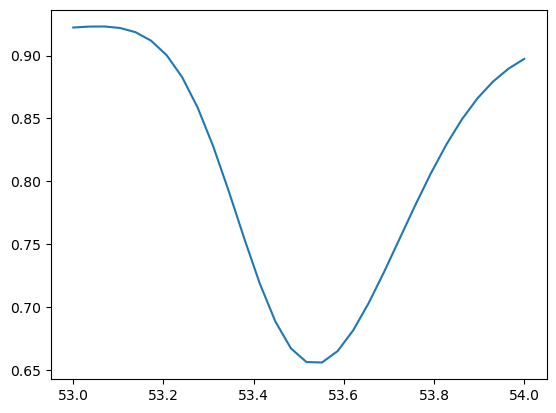

In [68]:
plt.plot(angles3, film_ref3)

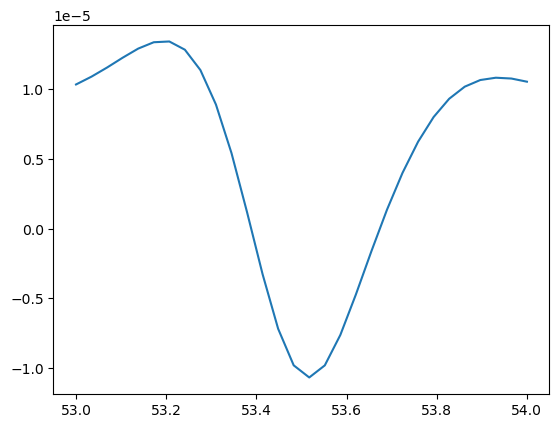

In [69]:
plt.plot(angles3, film_shift3)